In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium

data = pd.read_csv('clustering_data.csv')
data


/var/folders/b1/qj56vqzd40nc8q_gzw7rc8lr0000gn/T/ipykernel_96968/1248124035.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('clustering_data.csv')


,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
157121,Uttar Pradesh Circle,Bareilly Region,Meerut Division,Rly Road Meerut SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.98,77.68
157122,Uttar Pradesh Circle,Bareilly Region,Meerut Division,SGMandi SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.9724,77.67536
157123,Uttar Pradesh Circle,Bareilly Region,Meerut Division,W K Road SO,250001,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.99,77.71
157124,Kerala Circle,Calicut Region,Calicut Division,Kakkoti SO,673611,PO,Delivery,KOZHIKODE,KERALA,11.24529,75.778455


In [2]:
state_data = data.loc[data['StateName'] == "PUNJAB"]
state_data

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.2204,76.4964
182,Punjab Circle,NaN,Patiala Division,BINJAL B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.1407,76.6146
380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.6389875,74.9985706
431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.8607,76.1863
...,...,...,...,...,...,...,...,...,...,...,...
156928,Punjab Circle,Punjab West Region,Amritsar Division,Sjs Avenue SO,143008,PO,Delivery,AMRITSAR,PUNJAB,31.67,74.84
156929,Punjab Circle,Punjab West Region,Amritsar Division,Sultanwind SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.638561,74.882557
156930,Punjab Circle,Punjab West Region,Amritsar Division,Focal Point SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.62,74.91
156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.63,74.88


In [3]:
state_data.reset_index(drop=True)
state_data

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.2204,76.4964
182,Punjab Circle,NaN,Patiala Division,BINJAL B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.1407,76.6146
380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.6389875,74.9985706
431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.8607,76.1863
...,...,...,...,...,...,...,...,...,...,...,...
156928,Punjab Circle,Punjab West Region,Amritsar Division,Sjs Avenue SO,143008,PO,Delivery,AMRITSAR,PUNJAB,31.67,74.84
156929,Punjab Circle,Punjab West Region,Amritsar Division,Sultanwind SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.638561,74.882557
156930,Punjab Circle,Punjab West Region,Amritsar Division,Focal Point SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.62,74.91
156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.63,74.88


In [4]:
state_data.to_csv('filtered_data.csv')

In [5]:


data = pd.read_csv('filtered_data.csv')

data


,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
1,182,Punjab Circle,NaN,Patiala Division,BINJAL B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.140700,76.6146
2,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
3,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
4,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
...,...,...,...,...,...,...,...,...,...,...,...,...
3833,156928,Punjab Circle,Punjab West Region,Amritsar Division,Sjs Avenue SO,143008,PO,Delivery,AMRITSAR,PUNJAB,31.670000,74.84
3834,156929,Punjab Circle,Punjab West Region,Amritsar Division,Sultanwind SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.638561,74.882557
3835,156930,Punjab Circle,Punjab West Region,Amritsar Division,Focal Point SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.620000,74.91
3836,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [6]:
data.loc[data['Latitude'] == data['Latitude'].max()]

,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
2996,108987,Punjab Circle,Punjab West Region,Gurdaspur Division,Fateh Nangal BO,143519,BO,Delivery,GURDASPUR,PUNJAB,3194.0,75.32


In [7]:
df = pd.DataFrame(data)
df

,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
1,182,Punjab Circle,NaN,Patiala Division,BINJAL B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.140700,76.6146
2,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
3,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
4,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
...,...,...,...,...,...,...,...,...,...,...,...,...
3833,156928,Punjab Circle,Punjab West Region,Amritsar Division,Sjs Avenue SO,143008,PO,Delivery,AMRITSAR,PUNJAB,31.670000,74.84
3834,156929,Punjab Circle,Punjab West Region,Amritsar Division,Sultanwind SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.638561,74.882557
3835,156930,Punjab Circle,Punjab West Region,Amritsar Division,Focal Point SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.620000,74.91
3836,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [8]:
unique_pincodes = df.drop_duplicates(subset='Pincode')
unique_pincodes

,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
2,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
3,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
4,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
5,1164,Punjab Circle,DivReportingCircle,Patiala Division,BHANRA BO,147007,BO,Delivery,PATIALA,PUNJAB,30.254900,76.2993
...,...,...,...,...,...,...,...,...,...,...,...,...
3759,156074,Punjab Circle,Punjab West Region,Bhatinda Division,Bathinda Cantt SO,151004,PO,Delivery,BATHINDA,PUNJAB,30.160259,74.891122
3770,156087,Punjab Circle,Punjab West Region,Bhatinda Division,NDC Bathinda,151006,PO,Delivery,BATHINDA,PUNJAB,30.204600,74.949
3816,156524,Punjab Circle,DivReportingCircle,Patiala Division,Fatehgarh Sahib SO,140407,PO,Delivery,FATEHGARH SAHIB,PUNJAB,30.648083,76.39275
3836,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [9]:
unique_pincodes.reset_index(drop=True)

,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
1,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
2,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
3,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
4,1164,Punjab Circle,DivReportingCircle,Patiala Division,BHANRA BO,147007,BO,Delivery,PATIALA,PUNJAB,30.254900,76.2993
...,...,...,...,...,...,...,...,...,...,...,...,...
529,156074,Punjab Circle,Punjab West Region,Bhatinda Division,Bathinda Cantt SO,151004,PO,Delivery,BATHINDA,PUNJAB,30.160259,74.891122
530,156087,Punjab Circle,Punjab West Region,Bhatinda Division,NDC Bathinda,151006,PO,Delivery,BATHINDA,PUNJAB,30.204600,74.949
531,156524,Punjab Circle,DivReportingCircle,Patiala Division,Fatehgarh Sahib SO,140407,PO,Delivery,FATEHGARH SAHIB,PUNJAB,30.648083,76.39275
532,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [10]:
unique_pincodes.to_csv('unique_pincodes.csv')

In [11]:
import pandas as pd

data = pd.read_csv('filtered_data.csv')

data


,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
1,182,Punjab Circle,NaN,Patiala Division,BINJAL B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.140700,76.6146
2,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
3,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
4,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
...,...,...,...,...,...,...,...,...,...,...,...,...
3833,156928,Punjab Circle,Punjab West Region,Amritsar Division,Sjs Avenue SO,143008,PO,Delivery,AMRITSAR,PUNJAB,31.670000,74.84
3834,156929,Punjab Circle,Punjab West Region,Amritsar Division,Sultanwind SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.638561,74.882557
3835,156930,Punjab Circle,Punjab West Region,Amritsar Division,Focal Point SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.620000,74.91
3836,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [12]:
df = pd.DataFrame(data)
df

,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
1,182,Punjab Circle,NaN,Patiala Division,BINJAL B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.140700,76.6146
2,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
3,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
4,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
...,...,...,...,...,...,...,...,...,...,...,...,...
3833,156928,Punjab Circle,Punjab West Region,Amritsar Division,Sjs Avenue SO,143008,PO,Delivery,AMRITSAR,PUNJAB,31.670000,74.84
3834,156929,Punjab Circle,Punjab West Region,Amritsar Division,Sultanwind SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.638561,74.882557
3835,156930,Punjab Circle,Punjab West Region,Amritsar Division,Focal Point SO,143006,PO,Non Delivery,AMRITSAR,PUNJAB,31.620000,74.91
3836,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [13]:
unique_pincodes = df.drop_duplicates(subset='Pincode')
unique_pincodes

,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
2,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
3,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
4,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
5,1164,Punjab Circle,DivReportingCircle,Patiala Division,BHANRA BO,147007,BO,Delivery,PATIALA,PUNJAB,30.254900,76.2993
...,...,...,...,...,...,...,...,...,...,...,...,...
3759,156074,Punjab Circle,Punjab West Region,Bhatinda Division,Bathinda Cantt SO,151004,PO,Delivery,BATHINDA,PUNJAB,30.160259,74.891122
3770,156087,Punjab Circle,Punjab West Region,Bhatinda Division,NDC Bathinda,151006,PO,Delivery,BATHINDA,PUNJAB,30.204600,74.949
3816,156524,Punjab Circle,DivReportingCircle,Patiala Division,Fatehgarh Sahib SO,140407,PO,Delivery,FATEHGARH SAHIB,PUNJAB,30.648083,76.39275
3836,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [14]:
unique_pincodes.reset_index(drop=True)

,Unnamed: 0,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,181,Punjab Circle,NaN,Patiala Division,SWAI SINGH WALA B.O,147111,BO,Delivery,PATIALA,PUNJAB,30.220400,76.4964
1,380,Punjab Circle,Punjab West Region,Faridkot Division,Smalsar S.O,142049,PO,Delivery,MOGA,PUNJAB,30.638987,74.9985706
2,431,Punjab Circle,Punjab West Region,Faridkot Division,Golewala S.O,151214,PO,Delivery,FARIDKOT,PUNJAB,30.790411,74.699154
3,791,Punjab Circle,DivReportingCircle,Ludhiana Moffusil Division,BALION BO,141114,BO,Delivery,LUDHIANA,PUNJAB,30.860700,76.1863
4,1164,Punjab Circle,DivReportingCircle,Patiala Division,BHANRA BO,147007,BO,Delivery,PATIALA,PUNJAB,30.254900,76.2993
...,...,...,...,...,...,...,...,...,...,...,...,...
529,156074,Punjab Circle,Punjab West Region,Bhatinda Division,Bathinda Cantt SO,151004,PO,Delivery,BATHINDA,PUNJAB,30.160259,74.891122
530,156087,Punjab Circle,Punjab West Region,Bhatinda Division,NDC Bathinda,151006,PO,Delivery,BATHINDA,PUNJAB,30.204600,74.949
531,156524,Punjab Circle,DivReportingCircle,Patiala Division,Fatehgarh Sahib SO,140407,PO,Delivery,FATEHGARH SAHIB,PUNJAB,30.648083,76.39275
532,156931,Punjab Circle,Punjab West Region,Amritsar Division,NODAL DELIVERY OFFICE,143003,PO,Delivery,AMRITSAR,PUNJAB,31.630000,74.88


In [15]:
unique_pincodes.to_csv('unique_pincodes.csv')

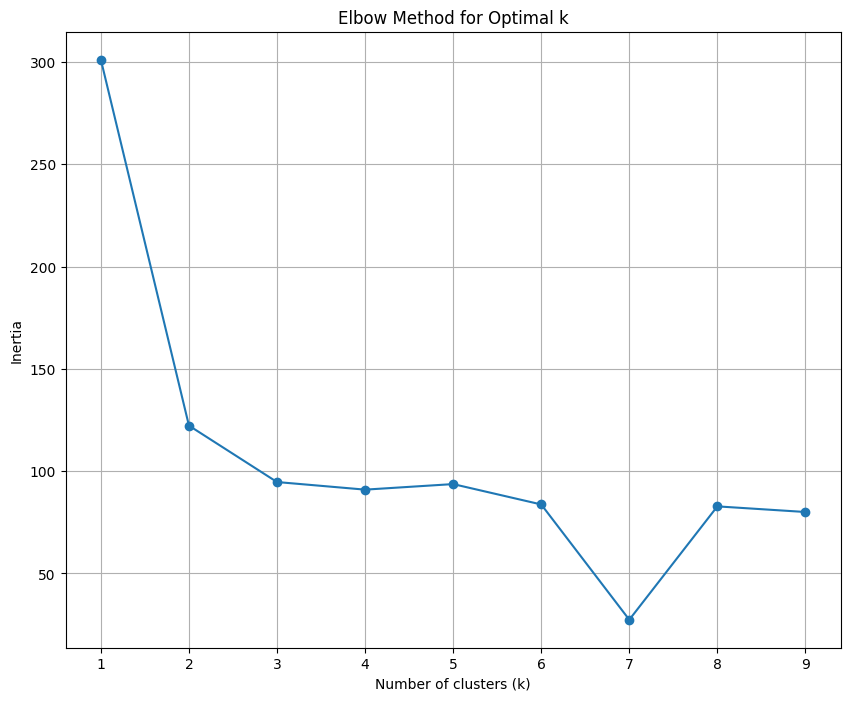

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def convert_to_number(val):
    try:
        return pd.to_numeric(val, errors="coerce")
    except ValueError:
        return np.nan


def random_centroids(data, k):
    centroids = []
    for _ in range(k):
        idx = np.random.randint(0, len(data))  
        centroid = data.iloc[idx].values  
        centroids.append(centroid)
    return np.array(centroids) 

def get_labels(data, centroids):
    distances = np.sqrt(((data[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))
    return np.argmin(distances, axis=1)


def new_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids


def calculate_inertia(data, centroids, labels):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia



loc = pd.read_csv("unique_pincodes.csv")
data = loc[["Latitude", "Longitude"]].copy() 

data = data.map(convert_to_number)
data = data.dropna()
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1


max_iterations = 100
inertia_values = []
k_values = range(1, 10) 

for k in k_values:
    centroids = random_centroids(data, k)
    old_centroids = pd.DataFrame()
    iteration = 1

    while iteration <= max_iterations and not old_centroids.equals(
        pd.DataFrame(centroids)
    ):
        old_centroids = pd.DataFrame(centroids.copy())
        labels = get_labels(data.values, centroids)
        centroids = new_centroids(data.values, labels, k)
        iteration += 1

    inertia = calculate_inertia(data.values, centroids, labels)
    inertia_values.append(inertia)


plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia_values, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.savefig("elbow_plot.png")
plt.show()


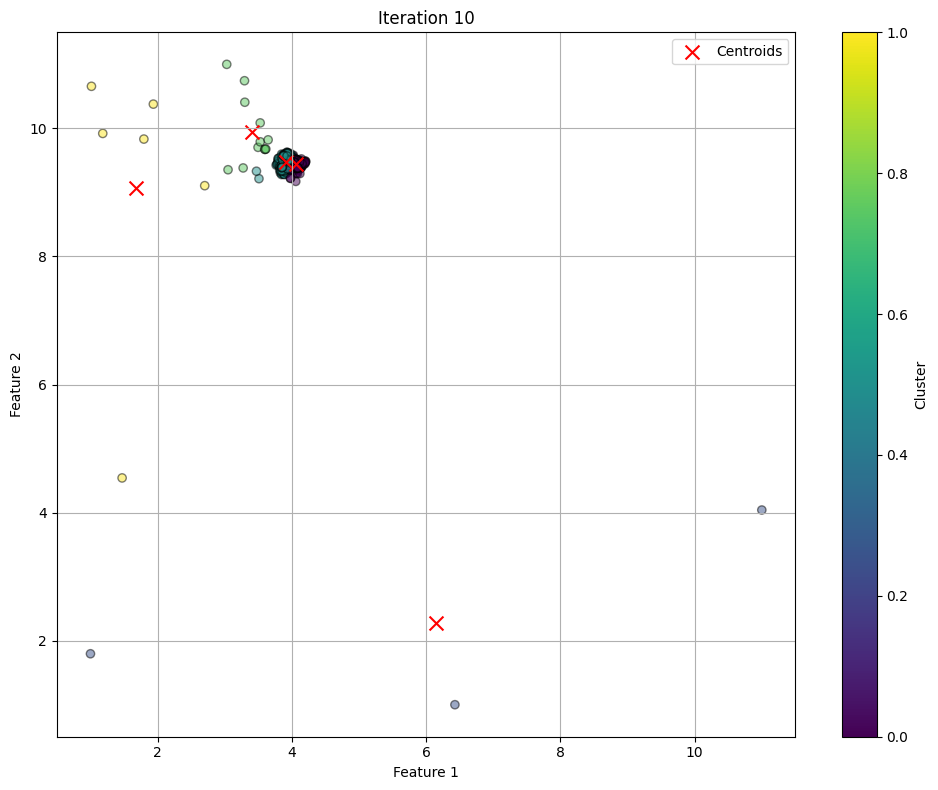


Final Centroids:
   Latitude  Longitude
0  4.062887   9.442769
1  6.142826   2.278712
2  3.916469   9.481585
3  3.412875   9.942738
4  1.683840   9.072878


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


def convert_to_number(val):
    try:
        return pd.to_numeric(val, errors="coerce")
    except ValueError:
        return np.nan


def random_centroids(data, k):
    centroids = []
    for _ in range(k):
        idx = np.random.randint(0, len(data))
        centroid = data.iloc[idx].values  
        centroids.append(centroid)
    return np.array(centroids) 


def get_labels(data, centroids):
    distances = np.sqrt(((data[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))
    return np.argmin(distances, axis=1)


def new_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids


def plot_clusters(data, labels, centroids, iteration):
    clear_output(wait=True)
    plt.figure(figsize=(10, 8))
    plt.title(f"Iteration {iteration}")

    plt.scatter(
        x=data[:, 0], y=data[:, 1], c=labels, cmap="viridis", alpha=0.5, edgecolors="k"
    )
    plt.scatter(
        x=centroids[:, 0],
        y=centroids[:, 1],
        marker="x",
        color="red",
        s=100,
        label="Centroids",
    )

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



loc = pd.read_csv("unique_pincodes.csv")
data = loc[["Latitude", "Longitude"]].copy()
data = data.applymap(convert_to_number)
data = data.dropna()
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1  #scaling


optimal_k = 5 #this can be changed according to elbow plot


max_iterations = 100
centroids = random_centroids(data, optimal_k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration <= max_iterations and not old_centroids.equals(pd.DataFrame(centroids)):
    old_centroids = pd.DataFrame(centroids.copy())
    labels = get_labels(data.values, centroids)
    centroids = new_centroids(data.values, labels, optimal_k)
    plot_clusters(data.values, labels, centroids, iteration)
    iteration += 1

# Print final centroids
print("\nFinal Centroids:")
centroids_df = pd.DataFrame(centroids, columns=["Latitude", "Longitude"])
print(centroids_df)

# Save the final centroids to a CSV file
centroids_df.to_csv("final_centroids.csv", index=False)


In [18]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapiExercises")

def get_lat_long(pincode):
    try:
        location = geolocator.geocode(f"{pincode}, India")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error getting coordinates for pincode {pincode}: {e}")
        return None, None

# Example data
pincode_data = pd.read_csv('unique_pincodes.csv')

# Apply the get_lat_long function to each pincode
pincode_data['Latitude'], pincode_data['Longitude'] = zip(*pincode_data['Pincode'].apply(get_lat_long))

# Remove rows with missing coordin
pincode_data = pincode_data.dropna(subset=['Latitude', 'Longitude'])

# Create a map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers to the map
for idx, row in pincode_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Pincode']).add_to(m)

# Save the map to an HTML file
m.save("map.html")

# To prevent being blocked by the geocoding service, you can add a delay
time.sleep(1)
